### Домашнее задание «Деревья решений»

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz

In [2]:
from sklearn import datasets
dataset_boston = datasets.load_boston()
data = pd.DataFrame(data=dataset_boston['data'], columns=dataset_boston['feature_names'])
data['MEDV'] = dataset_boston['target']

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = data.drop(columns='MEDV')
y = data['MEDV']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
dict_ = {}
depth = [x for x in range(1,20)]

for x in depth:
    model = DecisionTreeRegressor(max_depth=depth[x-1], random_state=0)
    model.fit(X_train, y_train)
    dict_[x] = model.score(X_test, y_test)
    
dict_

{1: 0.40923270541445755,
 2: 0.720452737210959,
 3: 0.7512049561062847,
 4: 0.8646893116543823,
 5: 0.8452070481904905,
 6: 0.8332550114570563,
 7: 0.8659706522744822,
 8: 0.8196556805819732,
 9: 0.7223550682778505,
 10: 0.822806952728862,
 11: 0.7353915377920005,
 12: 0.83988453319757,
 13: 0.7768844837577908,
 14: 0.7463532153300254,
 15: 0.7686353475626508,
 16: 0.7622636277593676,
 17: 0.7622636277593676,
 18: 0.7622636277593676,
 19: 0.7622636277593676}

In [7]:
model = DecisionTreeRegressor(max_depth=16,random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7622636277593676

In [28]:
#глудина дерева
#model.get_depth()

Попробуем оценить значимость признаков

([<matplotlib.axis.YTick at 0x27dd475be08>,
 <a list of 13 Text yticklabel objects>)

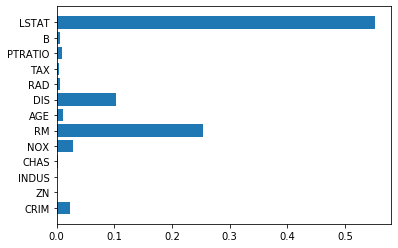

In [30]:
import numpy as np
model.feature_importances_
plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)

Самые значимые оказались LSTAT, RM и DIS, NOX

In [31]:
X = data[['RM', 'LSTAT', 'RM', 'NOX']]
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = DecisionTreeRegressor(max_depth=16, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6433182810591496

с полным набором признаков модель лучше работает

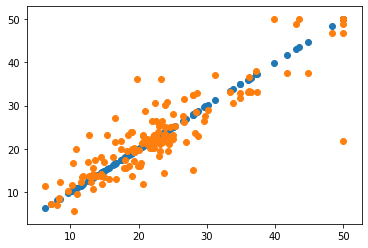

In [14]:
plt.figure
plt.scatter(y_test, y_test)
plt.scatter(y_test, model.predict(X_test))